In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso

%matplotlib inline

In [2]:
data = pd.read_csv('data/clash-data.csv')
original = data.copy()

In [3]:
original

,my_result,my_score,points,opponent_score,my_trophies,opponent_trophies,i_have_clan,opponent_has_clan,match_type,my_deck_elixir,...,my_Witch,my_Royal_Giant,my_Wizard,my_Bats,my_Archers,my_Skeleton_Barrel,my_Mini_P.E.K.K.A,my_Baby_Dragon,my_Inferno_Tower,my_Cannon
0,Victory,3,30,0,2919,2873,y,y,replay__ladderBattleType,3.625,...,0,0,0,0,0,0,0,0,7,0
1,Defeat,0,-25,1,2889,2948,y,y,replay__ladderBattleType,3.625,...,0,0,0,0,0,0,0,0,7,0
2,Victory,3,28,0,2914,2846,y,y,replay__ladderBattleType,3.625,...,0,0,0,0,0,0,0,0,7,0
3,Defeat,0,-28,1,2886,2912,y,y,replay__ladderBattleType,3.625,...,0,0,0,0,0,0,0,0,7,0
4,Defeat,0,-26,3,2914,2968,y,y,replay__ladderBattleType,3.625,...,0,0,0,0,0,0,0,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,Defeat,1,-1,3,58,89,n,n,replay__ladderBattleType,3.250,...,0,0,0,0,2,0,1,0,0,0
655,Defeat,1,-1,3,59,90,n,y,replay__ladderBattleType,3.500,...,0,0,0,0,2,0,0,0,0,0
656,Victory,3,30,0,60,30,n,n,replay__ladderBattleType,3.500,...,0,0,0,0,2,0,0,0,0,0
657,Victory,3,-30,0,0,0,n,n,replay__ladderBattleType,3.500,...,0,0,0,0,2,0,0,0,0,0


In [4]:
data = original.copy()

In [5]:
# There are 32 'Victory ' values in my_score, let's switch them with 'Victory'
data['my_result'] = data['my_result'].replace(to_replace='Victory ', value='Victory')

In [6]:
# Change ambiguous values to more normal ones - 30, -30
data.loc[data['points'] > 0, 'points'] = 30
data.loc[data['points'] < 0, 'points'] = -30

In [7]:
data.points.value_counts()
# should i do smth with the outliers ?
# I want to see for every card combo (op to my) which combos of cards have the highets win rate ?

 30    313
-30    297
 0      49
Name: points, dtype: int64

In [8]:
all_columns = list(data.columns)

for col in ['my_result', 'my_score', 'points', 'opponent_score', 'i_have_clan', 'opponent_has_clan', 
            'my_trophies', 'opponent_trophies', 'match_type', 'my_deck_elixir', 'op_deck_elixir', 'my_troops',
            'my_buildings', 'my_spells', 'op_troops', 'op_buildings', 'op_spells', 'my_commons', 'my_rares',
            'my_epics', 'my_legendaries', 'op_commons', 'op_rares', 'op_epics', 'op_legendaries']:
    all_columns.remove(col)
    
card_columns = all_columns
print(card_columns)

['op_Wizard', 'op_Three_Musketeers', 'op_Barbarian_Hut', 'op_Ice_Wizard', 'op_Flying_Machine', 'op_Prince', 'op_Bats', 'op_Inferno_Dragon', 'op_Skeletons', 'op_Lumberjack', 'op_Mirror', 'op_Goblins', 'op_Musketeer', 'op_Mini_P.E.K.K.A', 'op_Witch', 'op_Goblin_Gang', 'op_Lava_Hound', 'op_Bowler', 'op_Giant_Skeleton', 'op_Elite_Barbarians', 'op_Bandit', 'op_Sparky', 'op_Inferno_Tower', 'op_Poison', 'op_Barbarians', 'op_Mortar', 'op_Royal_Ghost', 'op_Bomb_Tower', 'op_Night_Witch', 'op_The_Log', 'op_Ice_Spirit', 'op_Hunter', 'op_Goblin_Hut', 'op_Skeleton_Army', 'op_Bomber', 'op_Tornado', 'op_Knight', 'op_Archers', 'op_Electro_Wizard', 'op_Lightning', 'op_Tesla', 'op_Mega_Knight', 'op_Rocket', 'op_X-Bow', 'op_Baby_Dragon', 'op_Ice_Golem', 'op_Cannon', 'op_Guards', 'op_Arrows', 'op_Rage', 'op_Balloon', 'op_Dark_Prince', 'op_Royal_Giant', 'op_Giant', 'op_Fireball', 'op_Zap', 'op_Miner', 'op_Hog_Rider', 'op_Spear_Goblins', 'op_Minion_Horde', 'op_Furnace', 'op_Clone', 'op_P.E.K.K.A', 'op_Mega_M

In [9]:
# Merge my-trophies and op_trophies into single ratio column

data['trophie-ratio'] = data['my_trophies'] - data['opponent_trophies']

In [10]:
# Lets see the diff in the cards
card_names = []
for card in card_columns:
    if 'my_' in card:
        card_name = card.split('my_')[1]
        data[card_name] = data['my_' + card_name] - data['op_' + card_name]
        card_names.append(card_name)

card_names
data

,my_result,my_score,points,opponent_score,my_trophies,opponent_trophies,i_have_clan,opponent_has_clan,match_type,my_deck_elixir,...,Witch,Royal_Giant,Wizard,Bats,Archers,Skeleton_Barrel,Mini_P.E.K.K.A,Baby_Dragon,Inferno_Tower,Cannon
0,Victory,3,30,0,2919,2873,y,y,replay__ladderBattleType,3.625,...,-3,0,0,0,0,0,0,0,7,0
1,Defeat,0,-30,1,2889,2948,y,y,replay__ladderBattleType,3.625,...,0,0,-7,0,0,0,-6,0,7,0
2,Victory,3,30,0,2914,2846,y,y,replay__ladderBattleType,3.625,...,0,0,0,0,0,0,0,0,2,0
3,Defeat,0,-30,1,2886,2912,y,y,replay__ladderBattleType,3.625,...,-3,0,0,0,0,0,0,-3,7,0
4,Defeat,0,-30,3,2914,2968,y,y,replay__ladderBattleType,3.625,...,-4,0,-7,0,0,0,-7,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,Defeat,1,-30,3,58,89,n,n,replay__ladderBattleType,3.250,...,-1,0,0,0,0,0,1,0,0,0
655,Defeat,1,-30,3,59,90,n,y,replay__ladderBattleType,3.500,...,0,0,0,0,0,0,0,0,0,0
656,Victory,3,30,0,60,30,n,n,replay__ladderBattleType,3.500,...,0,0,0,0,-2,0,0,-1,0,0
657,Victory,3,-30,0,0,0,n,n,replay__ladderBattleType,3.500,...,0,0,0,0,0,0,0,-1,0,0


In [11]:
# Lets see if the avg elixir cost of the decks can help us with the predictions. 
y = data['my_result']
X = data[['trophie-ratio', 'my_deck_elixir', 'op_deck_elixir', 'my_troops', 'my_buildings',
          'my_spells', 'op_troops', 'op_buildings', 'op_spells', 'my_commons', 'my_rares', 'my_epics',
          'my_legendaries', 'op_commons', 'op_rares', 'op_epics', 'op_legendaries'] + card_names]
labels, levels = pd.factorize(y)
y = labels

In [12]:
X

,trophie-ratio,my_deck_elixir,op_deck_elixir,my_troops,my_buildings,my_spells,op_troops,op_buildings,op_spells,my_commons,...,Witch,Royal_Giant,Wizard,Bats,Archers,Skeleton_Barrel,Mini_P.E.K.K.A,Baby_Dragon,Inferno_Tower,Cannon
0,46,3.625,3.875,5,1,2,4,0,4,4,...,-3,0,0,0,0,0,0,0,7,0
1,-59,3.625,3.875,5,1,2,5,1,2,4,...,0,0,-7,0,0,0,-6,0,7,0
2,68,3.625,3.750,5,1,2,4,1,3,4,...,0,0,0,0,0,0,0,0,2,0
3,-26,3.625,4.000,5,1,2,7,0,1,4,...,-3,0,0,0,0,0,0,-3,7,0
4,-54,3.625,4.250,5,1,2,7,0,1,4,...,-4,0,-7,0,0,0,-7,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,-31,3.250,3.625,5,0,3,6,0,2,4,...,-1,0,0,0,0,0,1,0,0,0
655,-31,3.500,3.750,5,0,3,6,0,2,3,...,0,0,0,0,0,0,0,0,0,0
656,30,3.500,4.250,5,0,3,4,1,3,3,...,0,0,0,0,-2,0,0,-1,0,0
657,0,3.500,3.500,5,0,3,6,0,2,3,...,0,0,0,0,0,0,0,-1,0,0


In [13]:
# Let's check the score with random generated ouput
from random import choice

guessed = 0

for i in range(len(y)):
    if choice([0, 1, 2]) == list(y)[i]:
        guessed += 1

print('Random result score: {}'.format(guessed / len(y)))

# So we have to beat the majestic score of around 17 percent

Random result score: 0.34597875569044007


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LogisticRegression()
# Scaling the data for better results
X_scaled = preprocessing.scale(X_train)
model.fit(X_scaled, y_train)
print("Training score: {}".format(model.score(preprocessing.scale(X_test), y_test)))
# Before I added (accidentally missed them) trophies to the model our score was very low ~ 3%
# now its above 95%
# Which lead me to the conclusion that after all the trophies are may be the most important feature

Training score: 0.9212121212121213


In [15]:
for alpha in [0.001, 0.01, 0.1, 1, 1000]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    print('Score with {} regularisation: {}'.format(alpha, lasso.score(X_test, y_test)))

Score with 0.001 regularisation: 0.5025628239149276
Score with 0.01 regularisation: 0.5104394626669462
Score with 0.1 regularisation: 0.5103369554449357
Score with 1 regularisation: 0.5023620028913448
Score with 1000 regularisation: -0.008550295857987722


In [16]:
for alpha in [0.001, 0.01, 0.1, 1, 10]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    print('Score with {} regularisation: {}'.format(alpha, ridge.score(X_test, y_test)))

Score with 0.001 regularisation: 0.49905922875087727
Score with 0.01 regularisation: 0.49909301542036677
Score with 0.1 regularisation: 0.4994027457773328
Score with 1 regularisation: 0.5009971509121536
Score with 10 regularisation: 0.5027869344283943


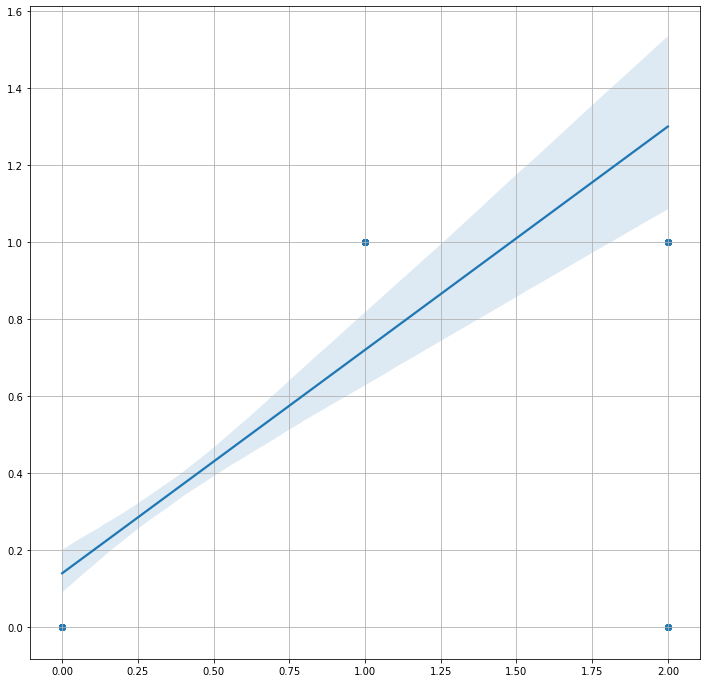

In [17]:
predictions_test = model.predict(X_test[['trophie-ratio', 'my_deck_elixir', 'op_deck_elixir', 'my_troops', 'my_buildings',
          'my_spells', 'op_troops', 'op_buildings', 'op_spells', 'my_commons', 'my_rares', 'my_epics',
          'my_legendaries', 'op_commons', 'op_rares', 'op_epics', 'op_legendaries'] + card_names])
plt.figure(figsize=(12,12))
sns.regplot(y_test, predictions_test)
plt.grid(True)
plt.show()

In [18]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

gnb = GaussianNB()
bnb = BernoulliNB()

predict = gnb.fit(X_train, y_train)
predict_bnb = bnb.fit(X_train, y_train)

In [19]:
# print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != predict_bnb).sum()))
bnb.score(X_test, y_test) - gnb.score(X_test, y_test)

0.44242424242424244

In [20]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [21]:
classifier = DecisionTreeClassifier().fit(X_train, y_train)
print(classifier.score(X_test, y_test))
# We can see that Decision tree performs close to logistic regression 

0.9636363636363636


In [22]:
classifier = DecisionTreeClassifier(min_samples_split=50).fit(X_train, y_train)
print(classifier.score(X_test, y_test))

0.9636363636363636


In [23]:
from sklearn.cluster import KMeans

km = KMeans()

km.fit(X_train, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
km.score(X_test, y_test)

-38970.51396885389

In [25]:
# KNN classification attempts to predict the class to which the output variable belong by computing the local probability.
# KNN regression tries to predict the value of the output variable by using a local average.
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train).score(X_test, y_test)

knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train).score(X_test, y_test)

0.8486400000000001

In [26]:
def calc_average_score(iterations, model):
    score = 0.0
    for i in range(iterations):
        local_X_train, local_X_test, local_y_train, local_y_test = train_test_split(X, y)
        score += model.score(local_X_test, local_y_test)
        
    return score / (iterations * 1.0)

In [27]:
print('Final scores:')
print('Logistic regression: {}'.format(calc_average_score(100, model)))
print('Gaussian naive Bayes: {}'.format(calc_average_score(100, gnb)))
print('Bernouli naive Bayes: {}'.format(calc_average_score(100, bnb)))
print('Decision tree: {}'.format(calc_average_score(100, classifier)))
print('kMeans: {}'.format(calc_average_score(100, km)))
print('kNN classifier: {}'.format(calc_average_score(100, knn_classifier)))
print('kNN regressor: {}'.format(calc_average_score(100, knn_regressor)))

# Because Decision tree and kNN classifier are local searching algorithms they are highly stochastic

Final scores:
Logistic regression: 0.9346060606060608
Gaussian naive Bayes: 0.4264848484848486
Bernouli naive Bayes: 0.8673333333333332
Decision tree: 0.9767272727272721
kMeans: -36245.70076584943
kNN classifier: 0.9758181818181813
kNN regressor: 0.8654701357330699
